In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

### scaling the data is very important for distance based algorithm( clustering, hierarchical, dbscan, pca etc) 

### Cluster
1. K-Means
2. Hierarchical (heat map, dendrogram)
3. DBSCAN
4. GMM

### Dimension Reduction

1. PCA
2. MDS
3. FA
4. LDA
5. t-SNE

In [19]:
# read the data
df = pd.read_csv('wine.csv')

In [20]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
df_target = df.iloc[:, 0:1]
df_target.head()

,Wine
0,1
1,1
2,1
3,1
4,1


In [22]:
df_target['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [23]:
df_target['Wine'].replace([1,2,3], [0,1,2], inplace = True)

In [24]:
df_target['Wine'].value_counts()

1    71
0    59
2    48
Name: Wine, dtype: int64

In [25]:
# drop wine column
df = df.iloc[: ,1:14]

In [26]:
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h2><font color='red'>K means clustering </font> </h2>


NO feature scaling yet

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
#instantiate your model

# Then fit the model to your data using the fit method

model = kmeans.fit(df)

# Finally predict the labels on the same data to show the category that point belongs to

pred_km = model.predict(df)


In [28]:
pred_km

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [29]:
unique, count = np.unique(pred_km, return_counts=True)
dict(zip(unique, count))

{0: 62, 1: 47, 2: 69}

### elbow plot

Text(0, 0.5, 'Average distance from centroid')

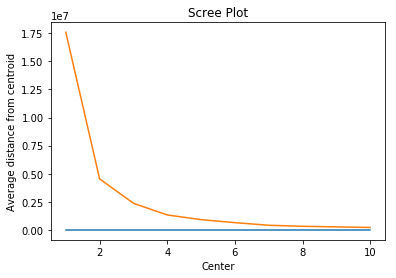

In [30]:
# score
scores= []
for center in range(1,11):
    kmeans = KMeans(center)
    
    model = kmeans.fit(df)
    
    scores.append((center, abs(model.score(df))))
    
centers = list(range(1,11))
plt.plot(centers, scores)
plt.title("Scree Plot")
plt.xlabel("Center")
plt.ylabel("Average distance from centroid")
    

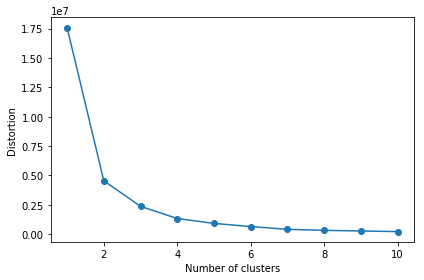

In [31]:
# inertia_
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

[link](http://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch11/ch11.ipynb)


<h2><font color='red'>silhouette coefficient </font> </h2>

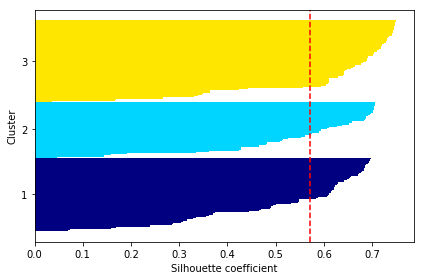

In [32]:

from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(df)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()


## Hierarchical Clustering

<h2><font color='red'> Hierarchical Clustering</font> </h2>

[link](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/clustering/hierarchical/clust_complete_linkage.ipynb)

#### note

clustermap in seaborn plot hierarchical clustering <br>
heatmap show the dataframe in color

### Pair-wise Distance Matrix, Rows

In [33]:
# take only 10 row 
df_distance = df.iloc[:10, :]

In [34]:
df_distance

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [35]:
labels = list(range(0,10))

In [36]:
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [37]:
['Row_{}'.format(i) for i  in range(0,10)]

['Row_0',
 'Row_1',
 'Row_2',
 'Row_3',
 'Row_4',
 'Row_5',
 'Row_6',
 'Row_7',
 'Row_8',
 'Row_9']

In [38]:
labels = ['Row_{}'.format(i) for i  in range(0,10)]

[pdist](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)

In [39]:
# euclidean distance
from scipy.spatial.distance import pdist,squareform

row_dist = pd.DataFrame(squareform(pdist(df_distance, metric='euclidean')), columns=labels, index=labels) 
row_dist

,Row_0,Row_1,Row_2,Row_3,Row_4,Row_5,Row_6,Row_7,Row_8,Row_9
Row_0,0.000000,31.265012,122.831154,415.245400,330.174500,385.295960,227.129474,230.091599,36.116966,35.274977
Row_1,31.265012,0.000000,135.224693,430.251561,315.668800,400.210294,240.063413,245.984974,6.786383,7.832918
Row_2,122.831154,135.224693,0.000000,295.262711,450.331053,265.256948,105.211462,111.827681,140.149239,140.074677
Row_3,415.245400,430.251561,295.262711,0.000000,745.039443,30.091969,190.796230,185.204752,435.313485,435.261604
Row_4,330.174500,315.668800,450.331053,745.039443,0.000000,715.054595,555.475848,560.020404,310.797076,310.702995
Row_5,385.295960,400.210294,265.256948,30.091969,715.054595,0.000000,160.812137,155.296886,405.283512,405.244172
Row_6,227.129474,240.063413,105.211462,190.796230,555.475848,160.812137,0.000000,25.686526,245.005154,245.022603
Row_7,230.091599,245.984974,111.827681,185.204752,560.020404,155.296886,25.686526,0.000000,251.179929,251.073674
Row_8,36.116966,6.786383,140.149239,435.313485,310.797076,405.283512,245.005154,251.179929,0.000000,3.270076
Row_9,35.274977,7.832918,140.074677,435.261604,310.702995,405.244172,245.022603,251.073674,3.270076,0.000000


In [40]:
# Correlation'

row_dist = pd.DataFrame(squareform(pdist(df_distance, metric='correlation')), columns=labels, index=labels) 
row_dist

,Row_0,Row_1,Row_2,Row_3,Row_4,Row_5,Row_6,Row_7,Row_8,Row_9
Row_0,0.000000,0.000285,0.000584,0.000904,0.000869,0.000860,0.000985,0.000322,0.000351,0.000334
Row_1,0.000285,0.000000,0.000070,0.000182,0.002130,0.000160,0.000216,0.000008,0.000009,0.000015
Row_2,0.000584,0.000070,0.000000,0.000043,0.002785,0.000038,0.000061,0.000041,0.000037,0.000039
Row_3,0.000904,0.000182,0.000043,0.000000,0.003485,0.000001,0.000004,0.000150,0.000136,0.000147
Row_4,0.000869,0.002130,0.002785,0.003485,0.000000,0.003408,0.003639,0.002197,0.002275,0.002214
Row_5,0.000860,0.000160,0.000038,0.000001,0.003408,0.000000,0.000007,0.000134,0.000119,0.000133
Row_6,0.000985,0.000216,0.000061,0.000004,0.003639,0.000007,0.000000,0.000184,0.000164,0.000181
Row_7,0.000322,0.000008,0.000041,0.000150,0.002197,0.000134,0.000184,0.000000,0.000006,0.000006
Row_8,0.000351,0.000009,0.000037,0.000136,0.002275,0.000119,0.000164,0.000006,0.000000,0.000005
Row_9,0.000334,0.000015,0.000039,0.000147,0.002214,0.000133,0.000181,0.000006,0.000005,0.000000


In [41]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,160.0,165.0,2.610709,2.0
cluster 2,67.0,106.0,2.654713,2.0
cluster 3,13.0,50.0,2.949610,2.0
cluster 4,8.0,9.0,3.270076,2.0
cluster 5,101.0,119.0,3.479253,2.0
cluster 6,168.0,174.0,3.885010,2.0
cluster 7,61.0,85.0,4.003723,2.0
cluster 8,123.0,125.0,4.469608,2.0
cluster 9,124.0,185.0,4.613263,3.0
cluster 10,86.0,116.0,4.673628,2.0


In [42]:
labels = df.index

#### dendrogram

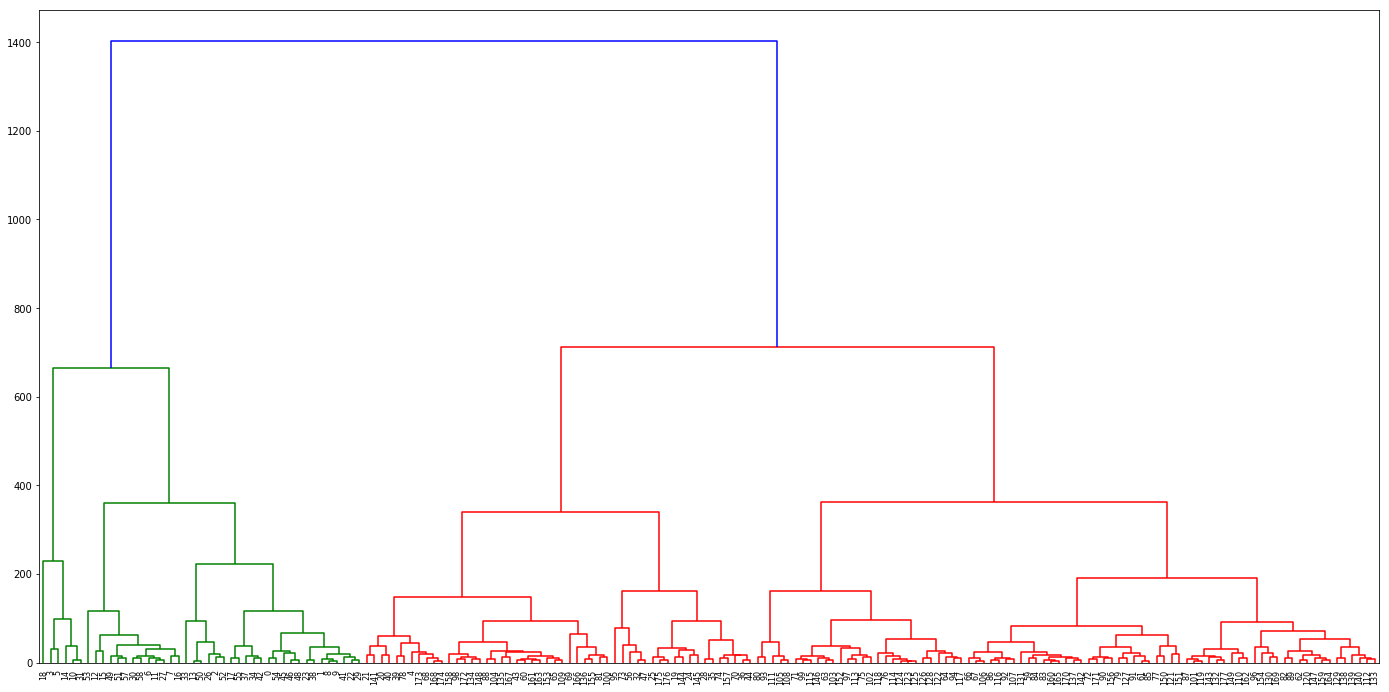

In [43]:

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize= (24,12))
row_dendr = dendrogram(row_clusters, labels=labels)

plt.xticks(fontsize = 8);

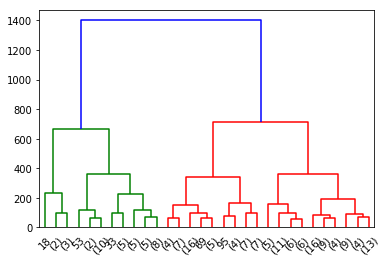

In [44]:
dendrogram(row_clusters,
           truncate_mode='lastp',
           labels=labels);

[kaggle_fancy](https://www.kaggle.com/hiramfoster/hierarchical-clustering-with-dendrograms)

In [45]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


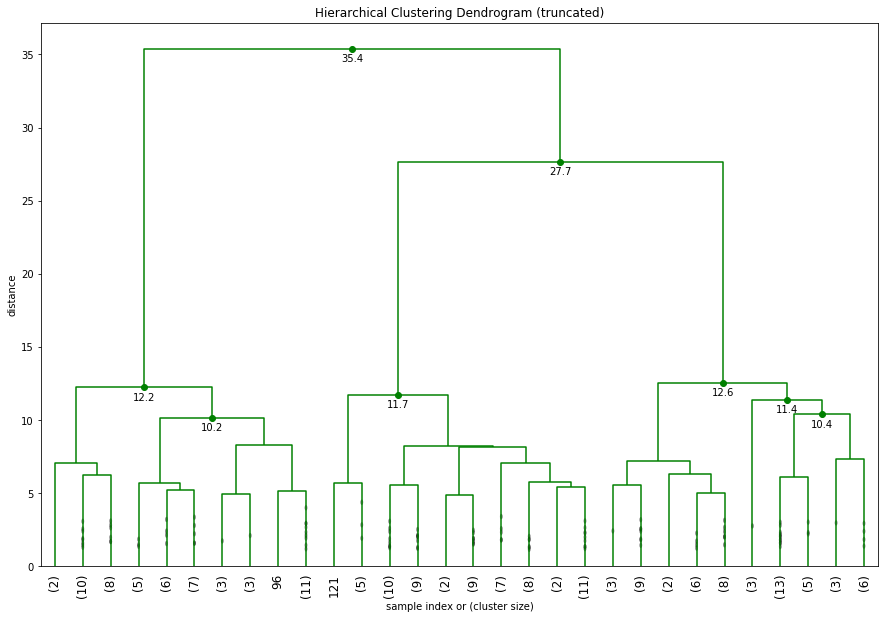

In [47]:
from scipy.cluster.hierarchy import dendrogram, ward

linked_array = ward(df_scaled)

fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=80
)

plt.show()

In [48]:
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
df.shape

(178, 13)

[link for sns clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

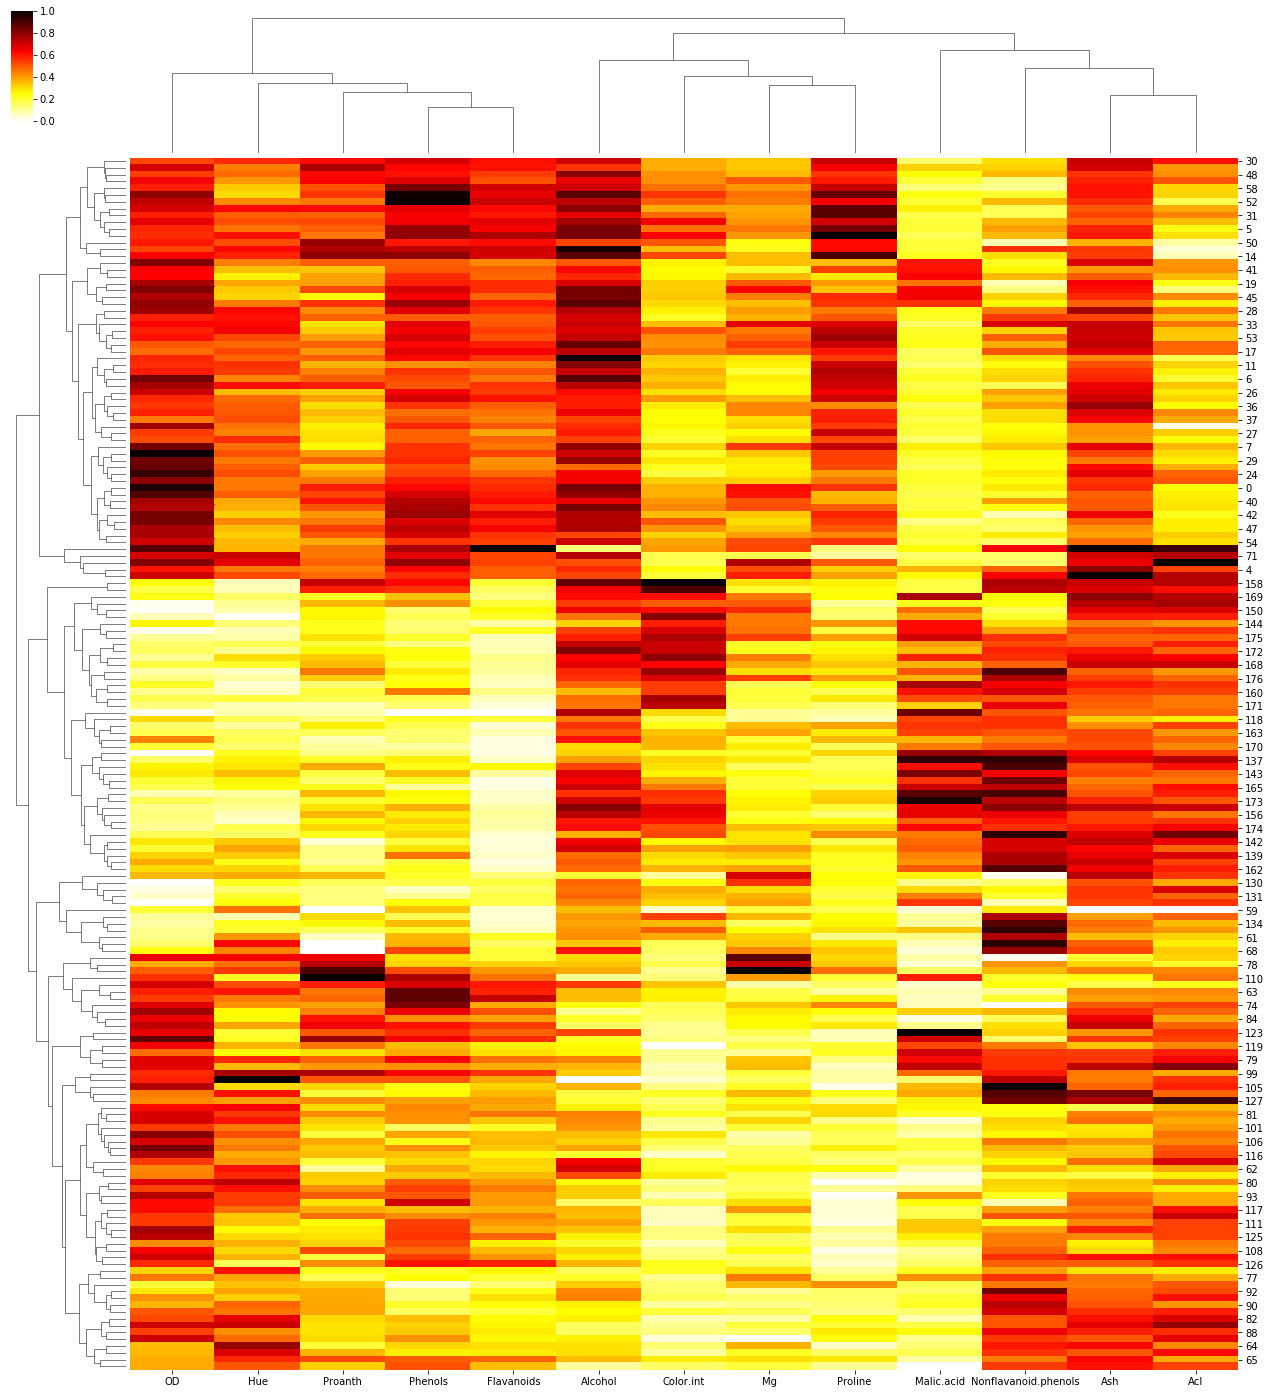

In [50]:

sns.clustermap(df,method = 'complete', 
               metric = 'euclidean' ,
               cmap= 'hot_r', 
               standard_scale=1,    ## column wise scaling
               figsize= (22,25));


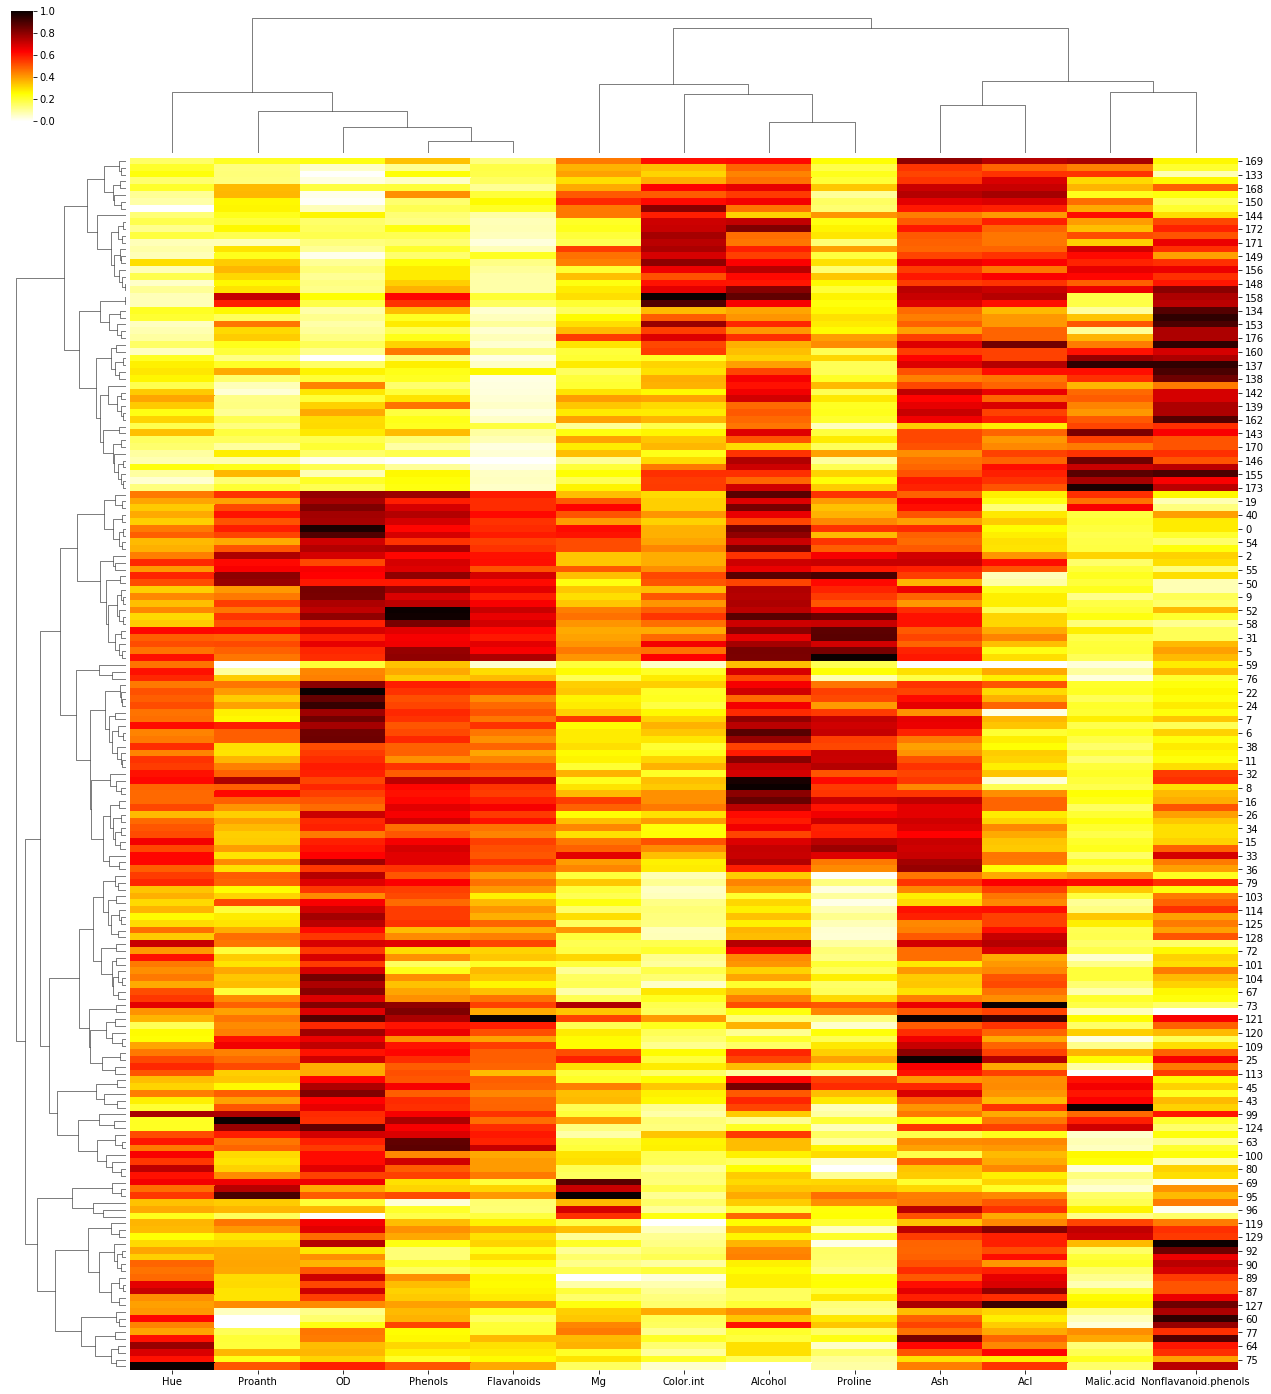

In [51]:

sns.clustermap(df,method = 'complete', metric = 'correlation' , cmap= 'hot_r', standard_scale=1,    figsize= (22,25));

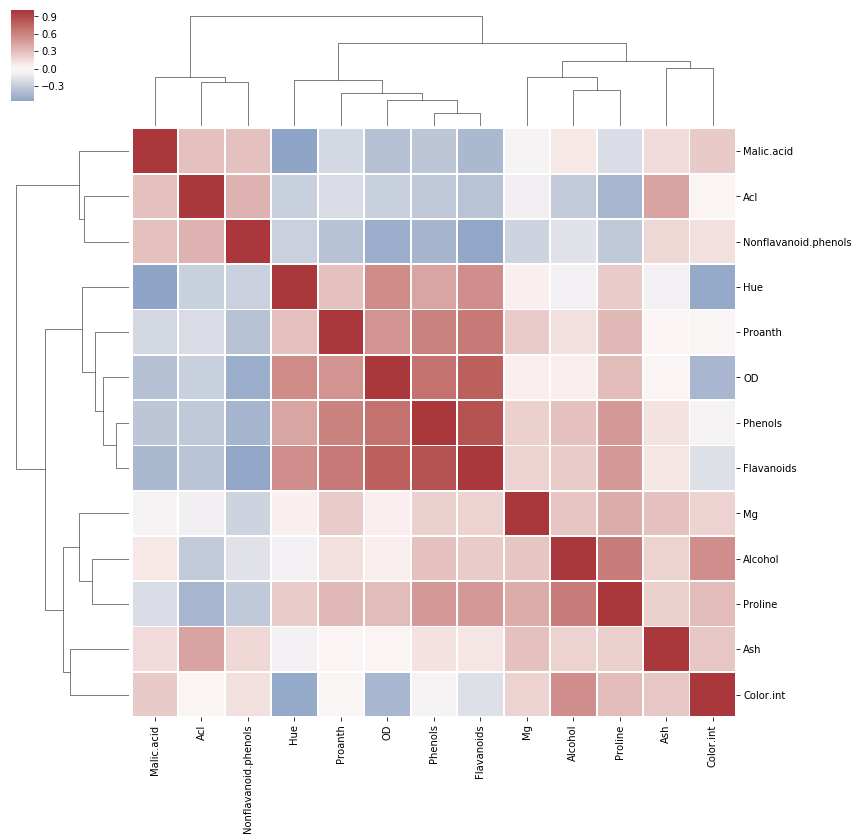

In [52]:
# column correlation 
sns.clustermap(df.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

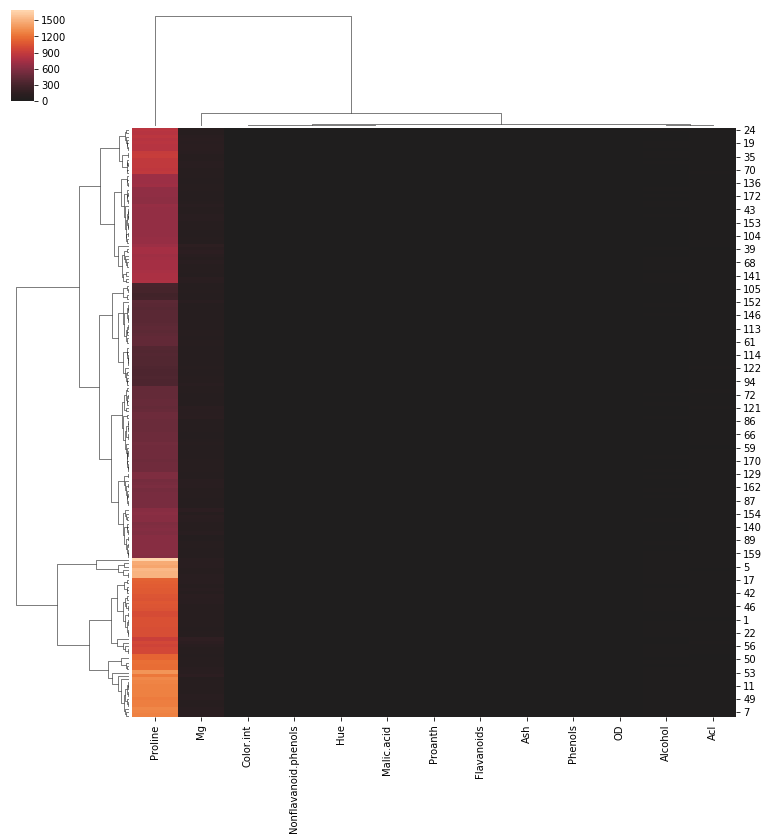

In [53]:
# without scaling
sns.clustermap(df, center=0, figsize=(13, 13))

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [55]:
df_scaled[:5, :]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [56]:
names = df.columns

In [57]:
# convert scaled matrix to dataframe
df_scaled_df = pd.DataFrame(df_scaled, columns=names)

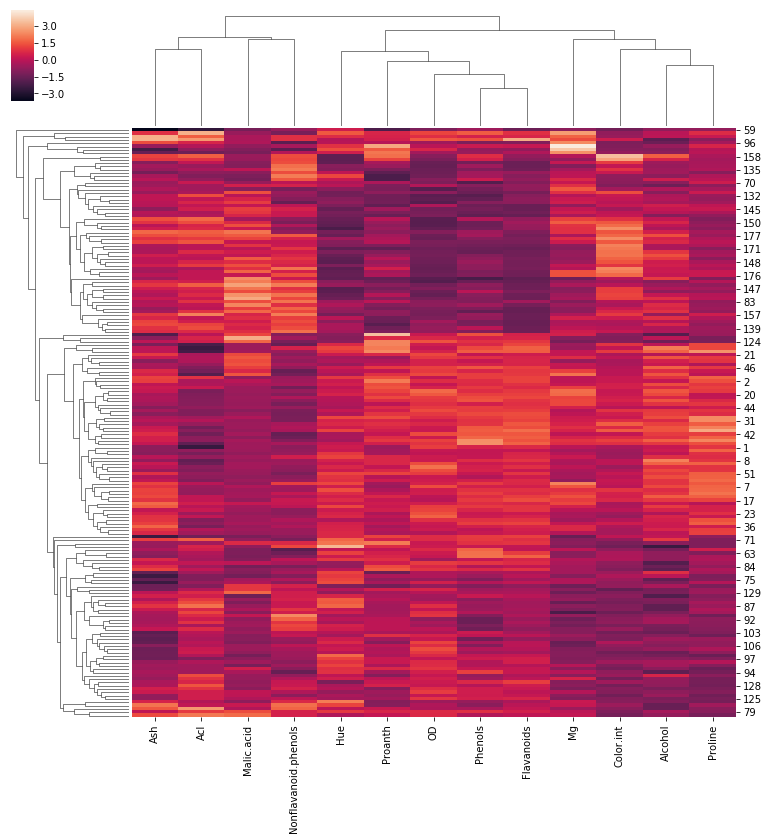

In [58]:
sns.clustermap(df_scaled_df,  figsize=(13, 13))

### Rand Score 

In [59]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(df_scaled_df)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(df_scaled_df)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(df_scaled_df)




In [60]:
ward_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [61]:
df_target = np.array(df_target).ravel()
df_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [62]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(df_target, ward_pred)
complete_ar_score = adjusted_rand_score(df_target, complete_pred)
avg_ar_score = adjusted_rand_score(df_target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7899332213582837 
Complete:  0.5771435822032458 
Average:  -0.005441973296580575


In [63]:
df_distance

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### heatmap

[link for details](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[annotated heat map](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html)

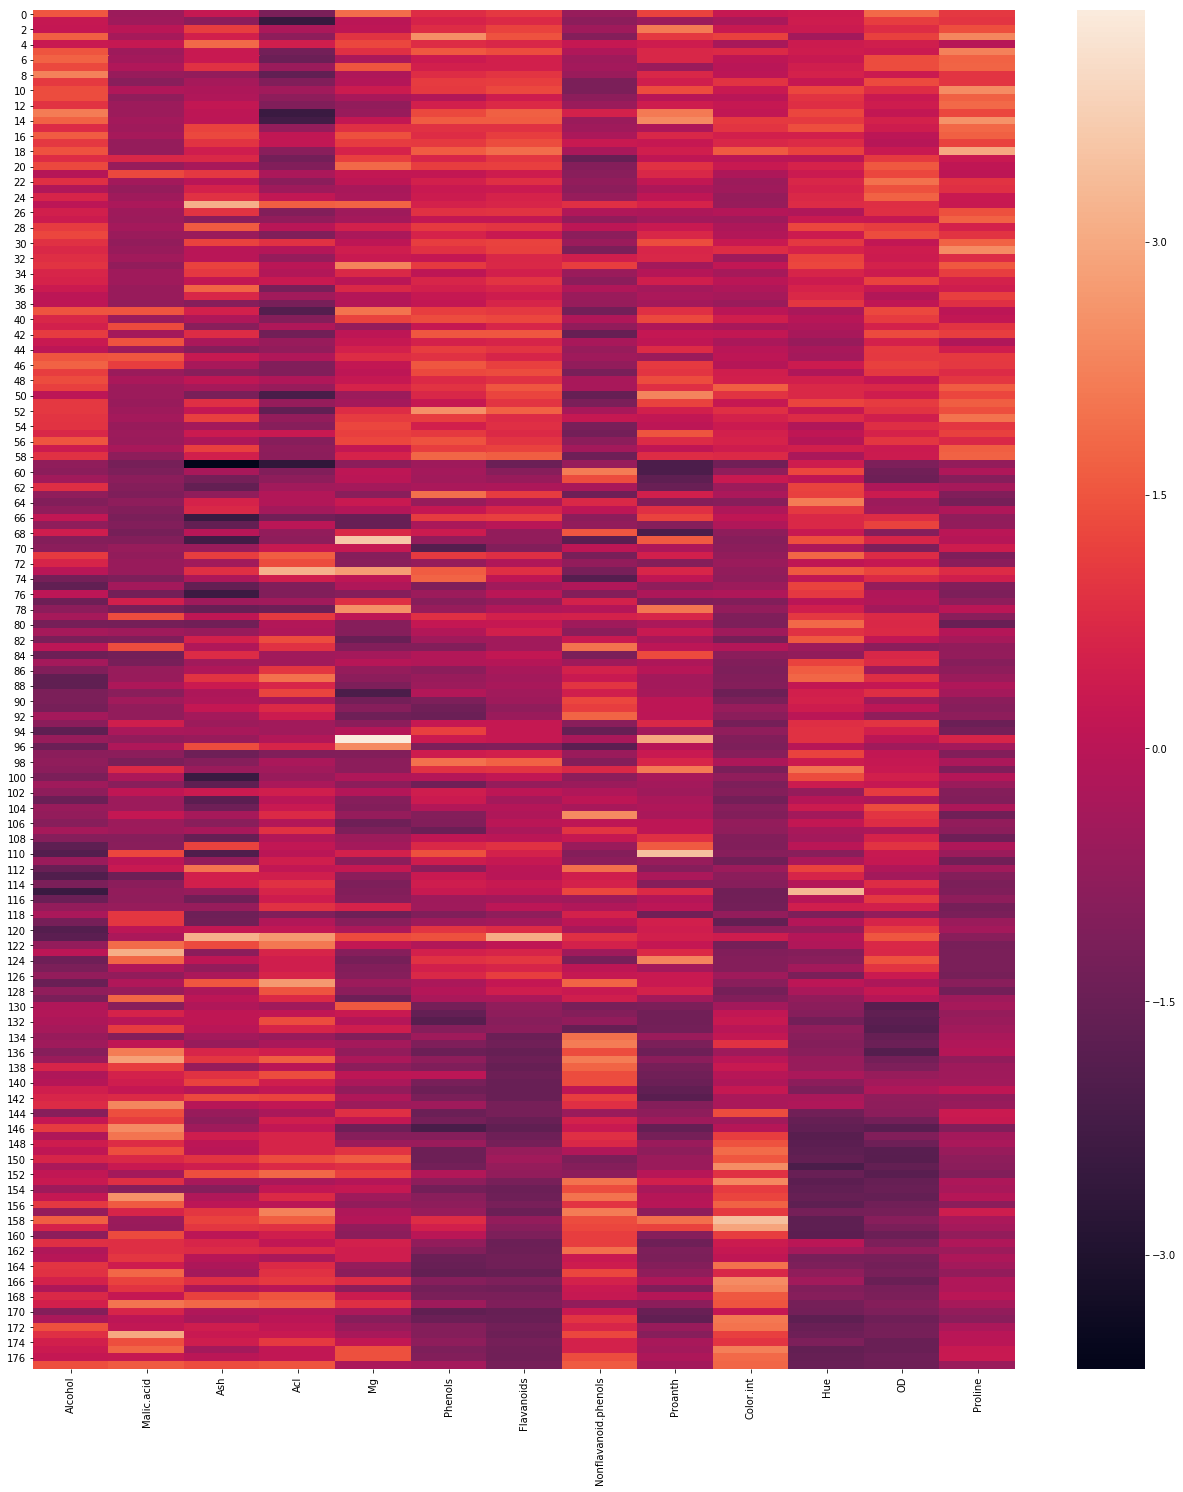

In [64]:
plt.figure(figsize = (22,25))
sns.heatmap(df_scaled_df);

In [65]:
df_scaled_df_1 = df_scaled_df.iloc[:10, :]

In [66]:
df_scaled_df_1

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


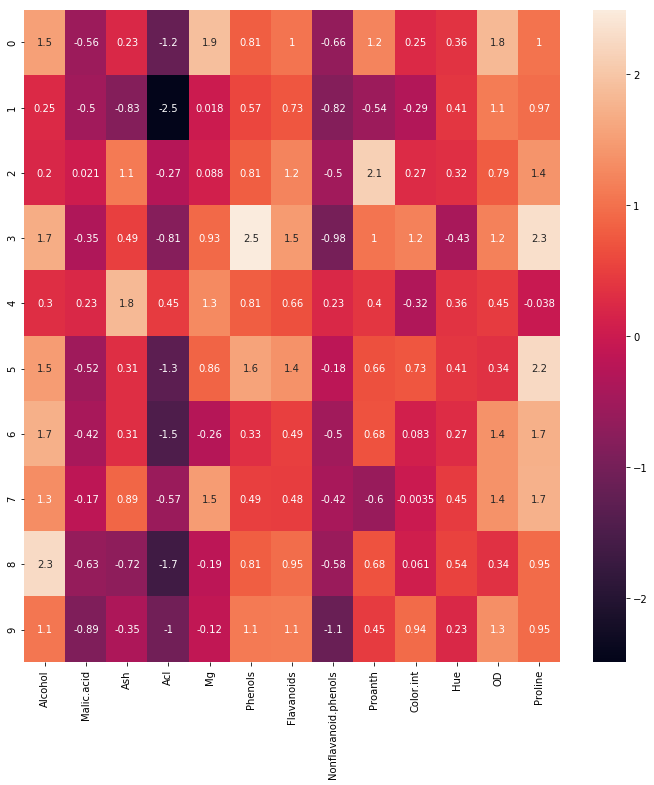

In [67]:
plt.figure(figsize = (12,12))
sns.heatmap(df_scaled_df_1, annot=True)

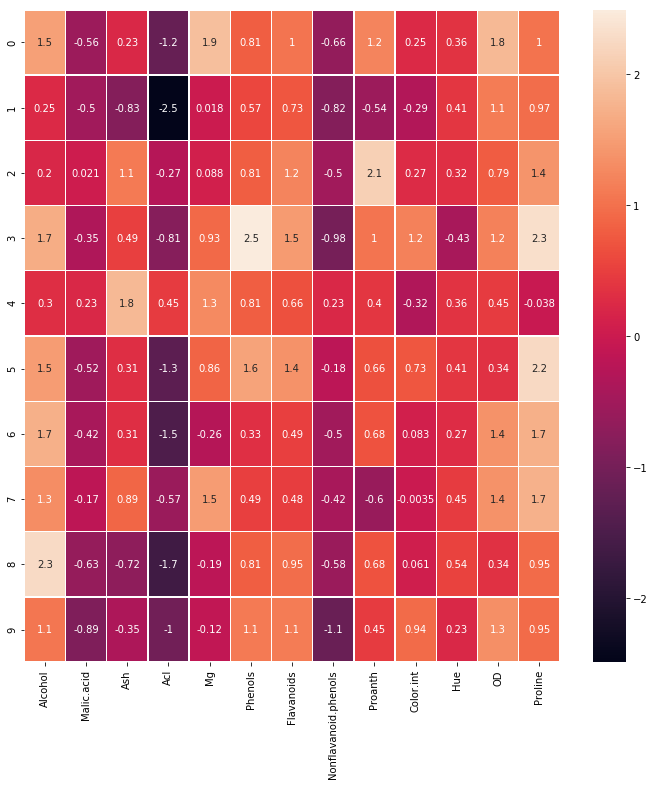

In [68]:
plt.figure(figsize = (12,12))
sns.heatmap(df_scaled_df_1, annot=True, linewidths= 0.4)


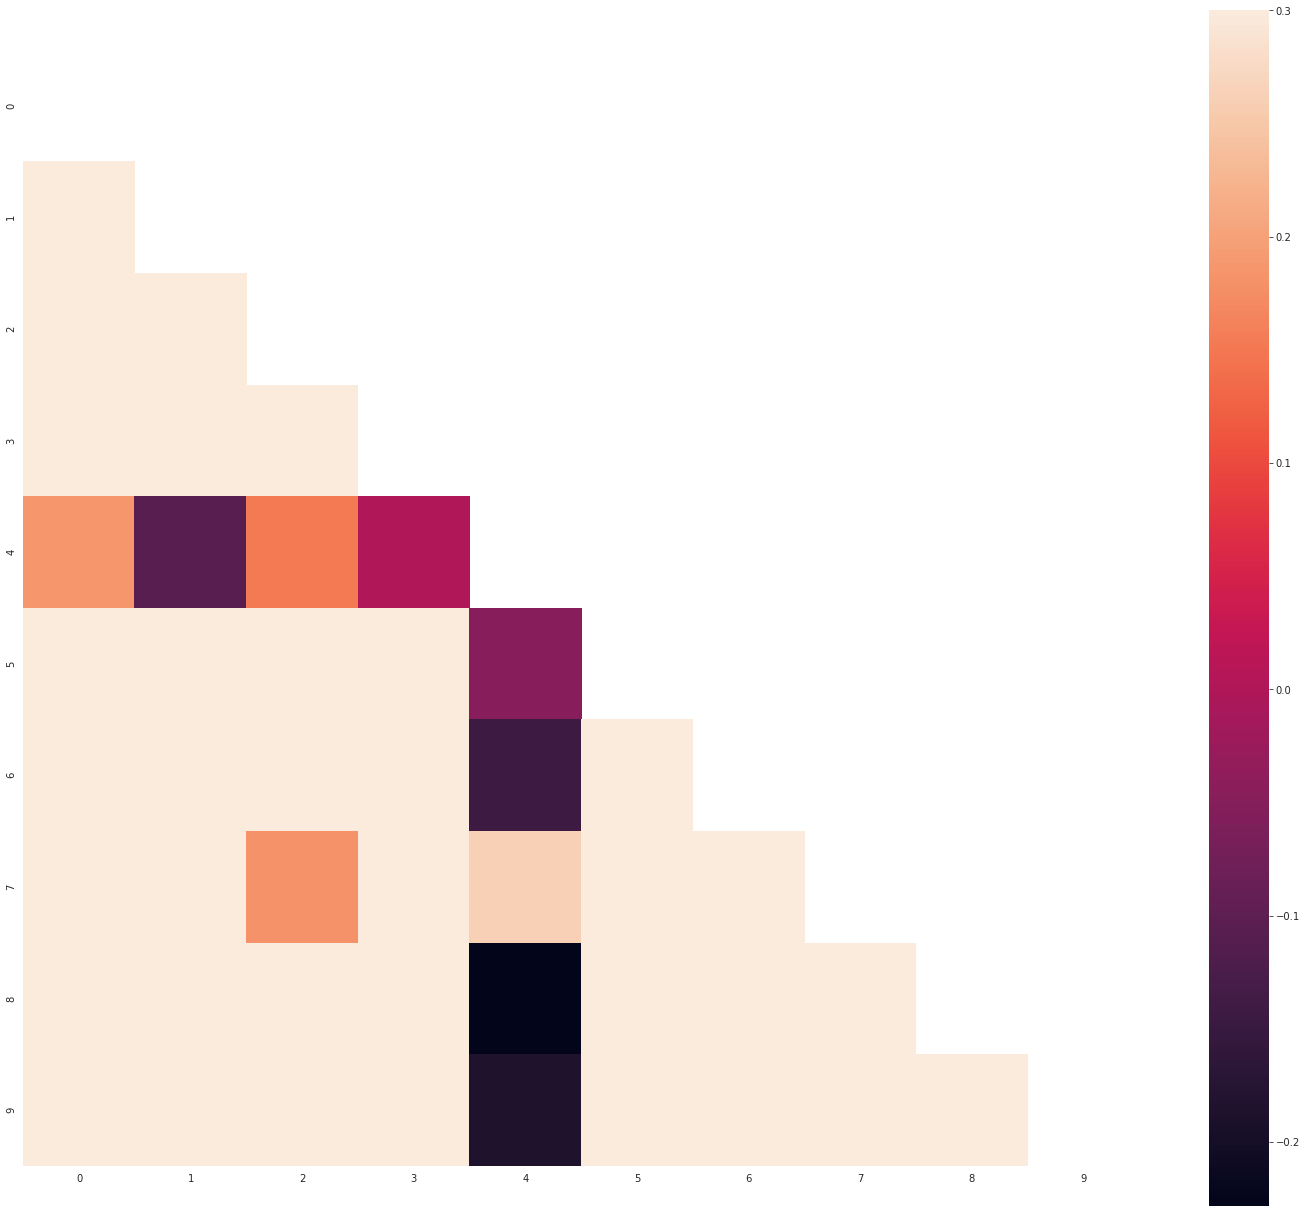

In [69]:
# correlation
plt.figure(figsize = (25,22))
corr = np.corrcoef(df_scaled_df_1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [70]:
df_scaled_df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### K-Means Clustering

In [71]:


kmeans = KMeans(3)
#instantiate your model

# Then fit the model to your data using the fit method

model = kmeans.fit(df_scaled_df)

# Finally predict the labels on the same data to show the category that point belongs to

pred_km = model.predict(df_scaled_df)

In [72]:
pred_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [73]:
df_targ_ser = np.array(df_target).ravel()

In [74]:
df_targ_ser

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [75]:
 adjusted_rand_score(df_targ_ser, pred_km)

0.8974949815093207

### GMM

In [76]:
# TODO: Import GaussianMixture
from sklearn.mixture import GaussianMixture

# TODO: Create an instance of Gaussian Mixture with 3 components
gmm = GaussianMixture(n_components=3)

# TODO: fit the dataset
gmm = gmm.fit(df_scaled_df)

# TODO: predict the clustering labels for the dataset
pred_gmm = gmm.predict(df_scaled_df)

In [77]:
pred_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [78]:
 adjusted_rand_score(df_targ_ser, pred_gmm)

0.8452681277002906

### DBSCAN

In [79]:
#TODO: Import sklearn's cluster module
from sklearn import cluster

#TODO: create an instance of DBSCAN
dbscan = cluster.DBSCAN(eps = 5, min_samples= 2)
#TODO: use DBSCAN's fit_predict to return clustering labels for dataset_1
clustering_labels_1 = dbscan.fit_predict(df_scaled_df)

In [80]:
clustering_labels_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### PCA

1. PCA reduce variables(features), when there is lot of variables, one can reduce variables by pca. then a model can fit. most time it still contain most of information.

2. PCA can used to visualise data in 2 dimension (clustering) (t-sne better for visualization)

3. can find relationship between variables (how variables change together)

4. variable can be plot in 2 dimension to see relationship.

5. this way one can find hidden or latent variable.

 when pca.transoform use, it transform whole data, and back number of pca = number of variable<br> (when variable number less than row number or observation) and all row.




In [81]:
from sklearn.decomposition import PCA
pca = PCA() # create a PCA object
pca.fit(df_scaled_df) # do the math
pca_data = pca.transform(df_scaled_df) 

here __pca_data__ have same number row as original data, <br> number of pca  = number of variable(13 here)  

__pca.components___ return pca of feature space (variable)

__components_ : array, shape (n_components, n_features)__

Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

__explained_variance_ : array, shape (n_components,)__
The amount of variance explained by each of the selected components.
Equal to n_components largest eigenvalues of the covariance matrix of X.
New in version 0.18.

__explained_variance_ratio_ : array, shape (n_components,)__
Percentage of variance explained by each of the selected components.
If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

__singular_values_ : array, shape (n_components,)__
The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.

__Eigenvalue__

Eigenvalues (also called characteristic values or latent roots) are the variances of the principal components.

__Interpretation__
You can use the size of the eigenvalue to determine the number of principal components. Retain the principal components with the largest eigenvalues. For example, using the Kaiser criterion, you use only the principal components with eigenvalues that are greater than 1.

To visually compare the size of the eigenvalues, use the scree plot. The scree plot can help you determine the number of components based on the size of the eigenvalues.

[link_minitab_best](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/)

In [82]:
# eigenvalues
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [83]:
sum(pca.explained_variance_)

13.07344632768361

In [84]:
# explained_variance_ratio_ obtain by diving the eigen value by sum of eigen value
4.73243698/13.07344632768361

0.36198848118409693

In [85]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [86]:
pca.n_components_

13

In [87]:
pca.singular_values_

array([28.94203422, 21.08225141, 16.04371561, 12.78973645, 12.32374195,
       10.68713954,  9.90368818,  7.8760733 ,  7.17081793,  6.6828618 ,
        6.33958815,  5.48097635,  4.28967045])

In [88]:
# 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

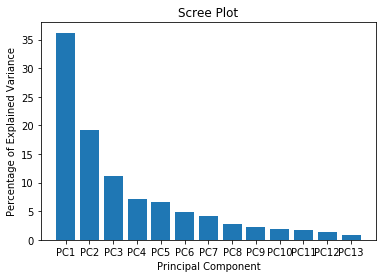

In [89]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 

__Scree plot__

The scree plot displays the number of the principal component versus its corresponding eigenvalue. The scree plot orders the eigenvalues from largest to smallest. The eigenvalues of the correlation matrix equal the variances of the principal components.

in the above plot percentage of explained variance vs pc was plotted.



__Interpretation__  
Use the scree plot to select the number of components to use based on the size of the eigenvalues. The ideal pattern is a steep curve, followed by a bend, and then a straight line. Use the components in the steep curve before the first point that starts the line trend.

In [90]:
pca_data[:5, :]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01, -2.23880128e-01,
         5.96426546e-01,  6.51390947e-02,  6.41442706e-01,
         1.02095585e+00, -4.51563395e-01,  5.40810414e-01,
        -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01, -9.27120244e-01,
         5.37756128e-02,  1.02441595e+00, -3.08846753e-01,
         1.59701372e-01, -1.42657306e-01,  3.88237741e-01,
         3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01,  5.49276047e-01,
         4.24205451e-01, -3.44216131e-01, -1.17783447e+00,
         1.13360857e-01, -2.86672847e-01,  5.83573183e-04,
         2.17165104e-02],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01,  1.14431000e-01,
        -3.83337297e-01,  6.43593498e-01,  5.25444215e-02,
         2.39412605e-01,  7.59584312e

In [91]:
# list of component,  [[pc1],[pc2],[pc3]], eigenvector
pca.components_[:3,:]

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [92]:
# when transpose,  [[variable_1],[variable_2],[variable_3]]
np.transpose(pca.components_)[:3,:]

array([[ 0.1443294 , -0.48365155, -0.20738262, -0.0178563 , -0.26566365,
        -0.21353865, -0.05639636, -0.39613926,  0.50861912,  0.21160473,
        -0.22591696, -0.26628645,  0.01496997],
       [-0.24518758, -0.22493093,  0.08901289,  0.53689028,  0.03521363,
        -0.53681385,  0.42052391, -0.06582674, -0.07528304, -0.30907994,
         0.07648554,  0.12169604,  0.02596375],
       [-0.00205106, -0.31606881,  0.6262239 , -0.21417556, -0.14302547,
        -0.15447466, -0.14917061,  0.17026002, -0.30769445, -0.02712539,
        -0.49869142, -0.04962237, -0.14121803]])

__Principal components (PC)__

The principal components are the linear combinations of the original variables that account for the variance in the data. The maximum number of components extracted always equals the number of variables. The eigenvectors, which are comprised of coefficients corresponding to each variable, are used to calculate the principal component scores. The coefficients indicate the relative weight of each variable in the component.  

__NOTE__
If you use the correlation matrix, you must standardize the variables to obtain the correct component score.  

__Interpretation__  
To interpret each principal component, examine the magnitude and the direction of coefficients of the original variables. The larger the absolute value of the coefficient, the more important the corresponding variable is in calculating the component. How large the absolute value of a coefficient has to be in order to deem it important is subjective. Use your specialized knowledge to determine at what level the correlation value is important.

In [93]:
# pca in feature space
pca_var = pd.DataFrame(np.transpose(pca.components_[0:13, :]), index = list(df_scaled_df.columns), columns=labels)
pca_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
Malic.acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
Acl,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
Mg,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
Phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
Nonflavanoid.phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
Proanth,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
Color.int,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


In [94]:
pca_var = pd.DataFrame(np.transpose(pca.components_[0:2, :]), index = list(df_scaled_df.columns), columns=['PC1', 'PC2'])
pca_var

,PC1,PC2
Alcohol,0.144329,-0.483652
Malic.acid,-0.245188,-0.224931
Ash,-0.002051,-0.316069
Acl,-0.239320,0.010591
Mg,0.141992,-0.299634
Phenols,0.394661,-0.065040
Flavanoids,0.422934,0.003360
Nonflavanoid.phenols,-0.298533,-0.028779
Proanth,0.313429,-0.039302
Color.int,-0.088617,-0.529996


__Scores__

Scores are linear combinations of the data that are determined by the coefficients for each principal component. To obtain the score for an observation, substitute its values in the linear equation for the principal component. If you use the correlation matrix, you must standardize the variables to obtain the correct component score when using the linear equation.  

In these results, the score for the first principal component can be calculated from the standardized data using the coefficients listed under PC1:
$$PC1 = 0.144 * alcohol +  
(-0.245188) * Malic.acid  +   
(-0.002) * Ash +    
(-0.239320) * Acl+  
0.141992 * mg  +  
0.394661 * phenol +  
0.422934 * Flavonoids +   
(-0.298533) * Nonflavanoid.phenols +  
0.313429 * Proanth + 
(-0.088617) * Color.int + 
0.296715 * Hue + 
0.376 * OD + 
0.2867 * Proline
$$

In [95]:
pca_var.shape

(13, 2)

In [96]:
index = list(df_scaled_df.columns)

In [97]:
#########################
#
# Determine which variables had the biggest influence on PC1
#
#########################
 
## get the name of the top 5 measurements (variables) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=index)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 5 variable
top_5_var = sorted_loading_scores[0:5].index.values
 
## print the variable names and their scores (and +/- sign)
print(loading_scores[top_5_var])

Flavanoids              0.422934
Phenols                 0.394661
OD                      0.376167
Proanth                 0.313429
Nonflavanoid.phenols   -0.298533
dtype: float64


In [157]:
def weight(component):
    index = list(df_scaled_df.columns)
    loading_score = pd.Series(pca.components_[component-1], index = index)
    sorted_loading_score = loading_score.abs().sort_values(ascending = False)
    top_10 = sorted_loading_score[0:10]
    
    
    return (top_10)

In [158]:
weight(1)

Flavanoids              0.422934
Phenols                 0.394661
OD                      0.376167
Proanth                 0.313429
Nonflavanoid.phenols    0.298533
Hue                     0.296715
Proline                 0.286752
Malic.acid              0.245188
Acl                     0.239320
Alcohol                 0.144329
dtype: float64

In [159]:
weight(2)

Color.int     0.529996
Alcohol       0.483652
Proline       0.364903
Ash           0.316069
Mg            0.299634
Hue           0.279235
Malic.acid    0.224931
OD            0.164496
Phenols       0.065040
Proanth       0.039302
dtype: float64

In [160]:
weight(3)

Ash                     0.626224
Acl                     0.612080
Alcohol                 0.207383
Nonflavanoid.phenols    0.170368
OD                      0.166005
Flavanoids              0.150682
Proanth                 0.149454
Phenols                 0.146179
Color.int               0.137306
Mg                      0.130757
dtype: float64

__Loading plot__. 

The loading plot graphs the coefficients of each variable for the first component versus the coefficients for the second component.

__Interpretation__  
Use the loading plot to identify which variables have the largest effect on each component. Loadings can range from -1 to 1. Loadings close to -1 or 1 indicate that the variable strongly influences the component. Loadings close to 0 indicate that the variable has a weak influence on the component. Evaluating the loadings can also help you characterize each component in terms of the variables.

In [98]:
coeff = np.transpose(pca.components_[0:2, :])
                     

In [99]:
labels = list(pca_var.index)
labels

['Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

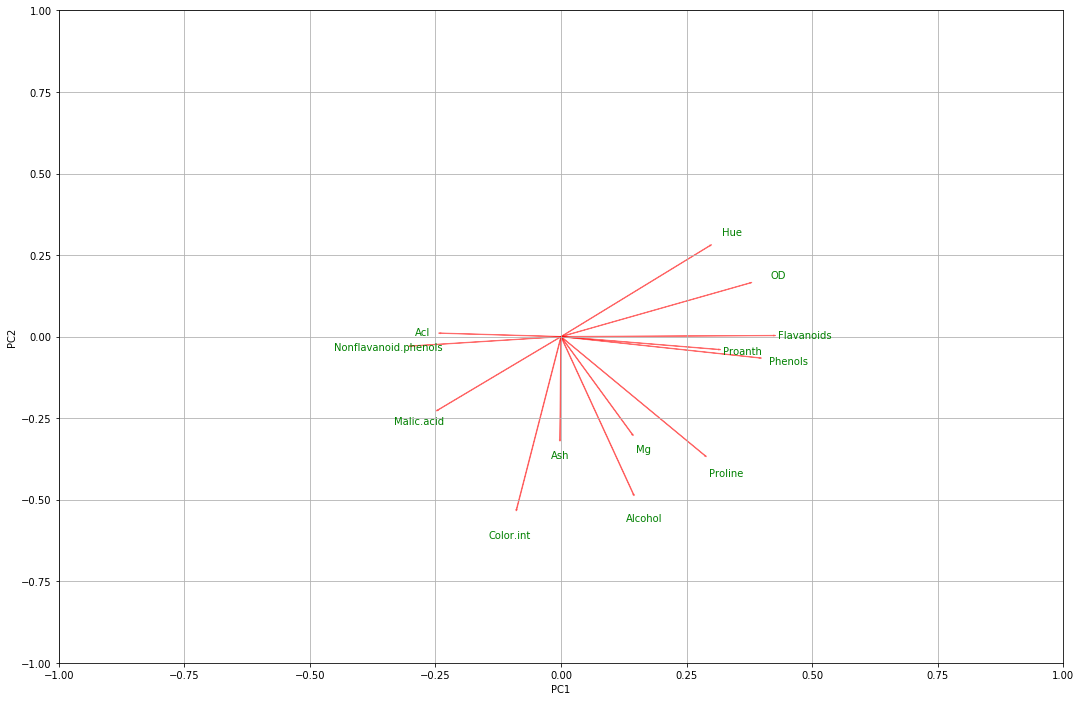

In [100]:
plt.figure(figsize = (18,12))
for i in range(13):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

In [101]:
np.transpose(pca.components_[0:2, :])

array([[ 0.1443294 , -0.48365155],
       [-0.24518758, -0.22493093],
       [-0.00205106, -0.31606881],
       [-0.23932041,  0.0105905 ],
       [ 0.14199204, -0.299634  ],
       [ 0.39466085, -0.06503951],
       [ 0.4229343 ,  0.00335981],
       [-0.2985331 , -0.02877949],
       [ 0.31342949, -0.03930172],
       [-0.0886167 , -0.52999567],
       [ 0.29671456,  0.27923515],
       [ 0.37616741,  0.16449619],
       [ 0.28675223, -0.36490283]])

In [102]:
# pca fit transform return below  data set
# pca = PCA() # create a PCA object
# pca.fit(df_scaled_df) # do the math
# pca_data = pca.transform(df_scaled_df) 

we can choose how many principle component we want(n_component). maximum pc is number of variables(features). 



In [103]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

In [104]:
index_type = df_scaled_df.index
pca_df = pd.DataFrame(pca_data, index=index_type, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


__Score plot__  

The score plot graphs the scores of the second principal component versus the scores of the first principal component.  

__Interpretation__  
If the first two components account for most of the variance in the data, you can use the score plot to assess the data structure and detect clusters, outliers, and trends. Groupings of data on the plot may indicate two or more separate distributions in the data. If the data follow a normal distribution and no outliers are present, the points are randomly distributed around zero.

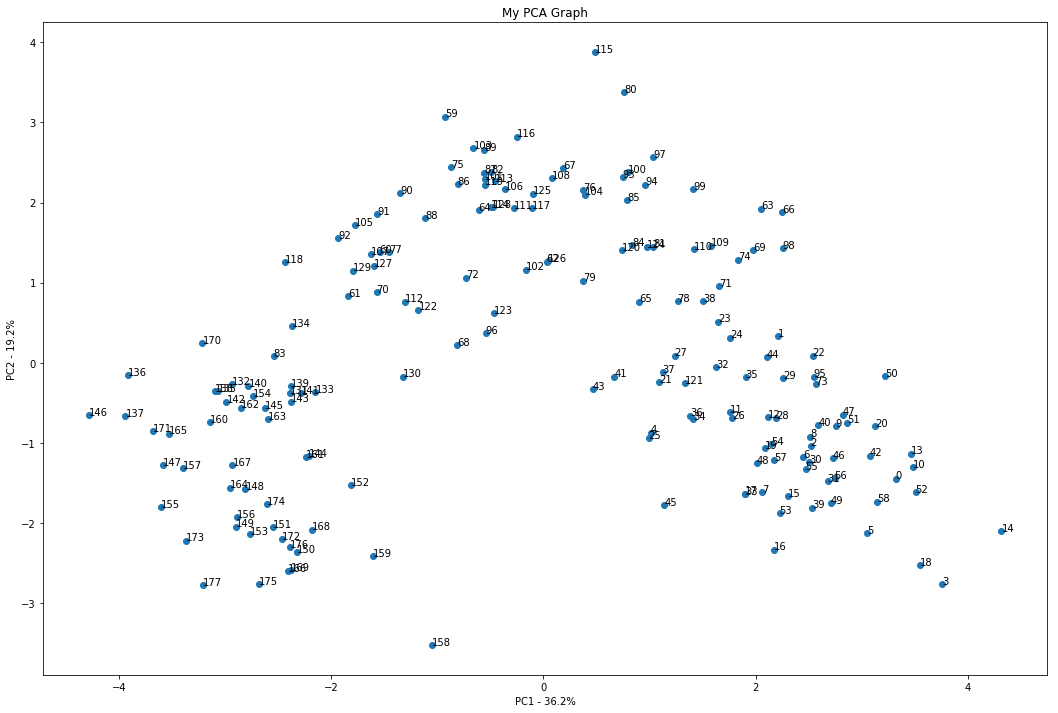

In [105]:
plt.figure(figsize = (18,12))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

__Biplot__

The biplot overlays the score plot and the loading plot.

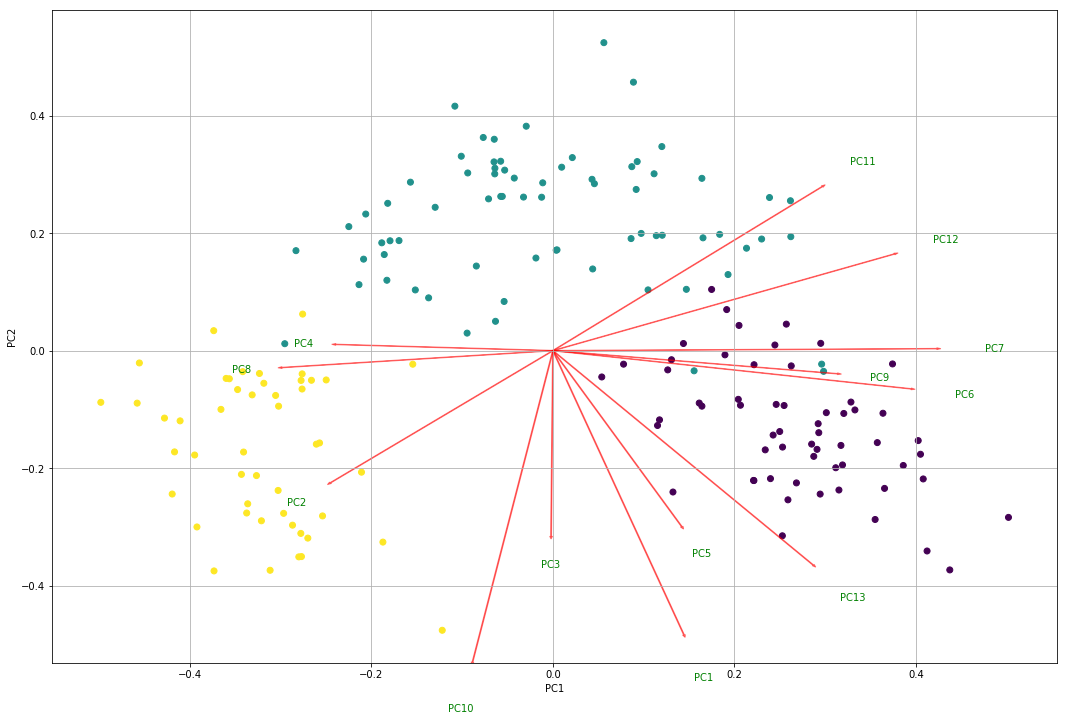

In [106]:
plt.figure(figsize = (18,12))

scalex = 1.0/(pca_df.PC1.max() - pca_df.PC1.min())
scaley = 1.0/(pca_df.PC2.max() - pca_df.PC2.min())
plt.scatter(pca_df.PC1 * scalex, pca_df.PC2 * scaley, c = df_target)

for i in range(13):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import pandas as pd
from sklearn.preprocessing import StandardScaler

In [108]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

In [109]:
pca = PCA()
x_new = pca.fit_transform(X)

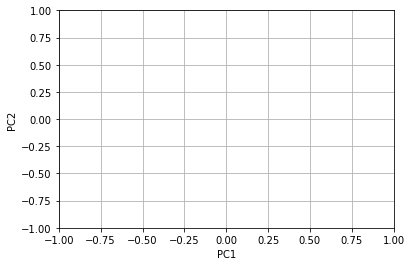

In [110]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

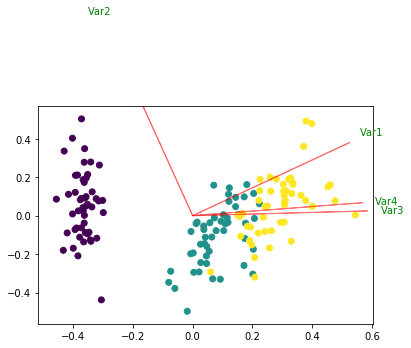

In [111]:
#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

### prince library

[link](https://github.com/MaxHalford/prince#principal-component-analysis-pca)

In [112]:
import prince

In [113]:
 pca = prince.PCA(
     n_components=2,
    n_iter=3,
     rescale_with_mean=True,
    rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42)
     
 pca = pca.fit(df_scaled_df)

In [114]:
pca.transform(df_scaled_df).head()

,0,1
0,3.316751,-1.443461
1,2.209465,0.333394
2,2.516740,-1.031151
3,3.757066,-2.756371
4,1.008908,-0.869832


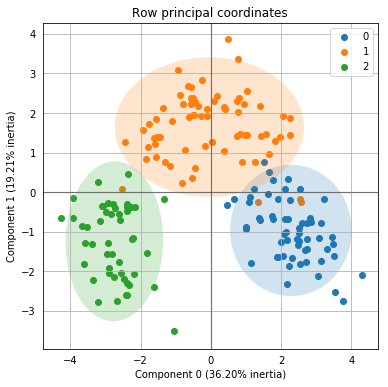

In [115]:
ax = pca.plot_row_coordinates(df_scaled_df,
     ax=None,
     figsize=(6, 6),
    x_component=0,
     y_component=1,
    labels=None,
   color_labels=df_target,
     ellipse_outline=False,
    ellipse_fill=True,
    show_points=True)

###  PCA

In [116]:
col = sns.color_palette()[0:3]

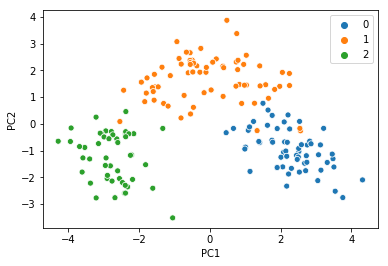

In [117]:
sns.scatterplot(pca_df.PC1, pca_df.PC2, hue = df_target, palette= col)

## FA

In [118]:
 from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=7, random_state=0)
fa_results = fa.fit_transform(df_scaled_df)

In [119]:
df_fa = pd.DataFrame(df_target, columns = ['ind_fa'])
df_fa['x-fa'] = fa_results[:,0]
df_fa['y-fa'] = fa_results[:,1]



In [120]:
fa_results[5:6,:]

array([[-0.89076596,  1.50045126, -0.46246285, -0.6509817 , -0.38669508,
        -0.88304428,  0.31657385]])

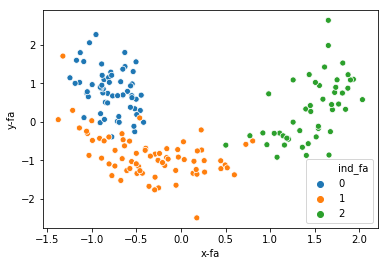

In [121]:
sns.scatterplot(df_fa['x-fa'], df_fa['y-fa'], hue = df_fa['ind_fa'], palette=col )

### MDS

In [122]:
from sklearn.manifold import MDS


mds = MDS(n_components=2)
mds_results = mds.fit_transform(df_scaled_df)
mds_results.shape


(178, 2)

In [123]:
mds_results[:4, :]

array([[ 1.17172911, -3.9667701 ],
       [-1.08038235, -3.0943144 ],
       [ 1.32241638, -2.87858627],
       [ 2.2643994 , -4.54177453]])

In [124]:
df_mds = pd.DataFrame(df_target, columns = ['ind_mds'])
df_mds['x-mds'] = mds_results[:,0]
df_mds['y-mds'] = mds_results[:,1]

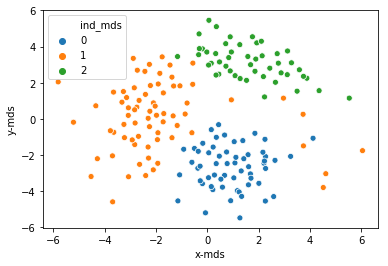

In [125]:
sns.scatterplot(df_mds['x-mds'], df_mds['y-mds'], hue = df_mds['ind_mds'], palette=col )

### t-SNE

[link](https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)

In [126]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled_df)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.839161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.939339
[t-SNE] KL divergence after 300 iterations: 0.336962
t-SNE done! Time elapsed: 0.3239450454711914 seconds


In [127]:
df_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [128]:
df_tsne = pd.DataFrame(df_target, columns = ['index_t'])
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]


In [129]:
df_tsne.head()

,index_t,x-tsne,y-tsne
0,0,10.819605,8.741542
1,0,8.273846,6.952665
2,0,6.765347,11.534558
3,0,9.397840,12.124855
4,0,3.442558,9.304165


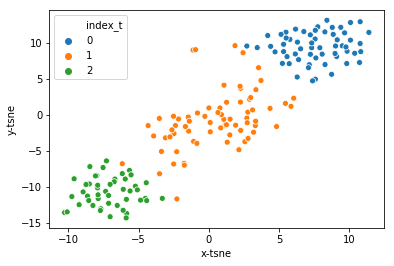

In [130]:
sns.scatterplot(df_tsne['x-tsne'], df_tsne['y-tsne'], hue = df_tsne['index_t'], palette=col )

### Linear Discriminant Analysis (LDA)



In [131]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_results = lda.fit(df_scaled_df, df_target).transform(df_scaled_df)

In [132]:
lda_results[:4, ]

array([[-4.70024401,  1.97913835],
       [-4.30195811,  1.17041286],
       [-3.42071952,  1.42910139],
       [-4.20575366,  4.00287148]])

In [133]:
df_lda = pd.DataFrame(df_target, columns = ['index_lda'])
df_lda['x-lda'] = lda_results[:,0]
df_lda['y-lda'] = lda_results[:,1]

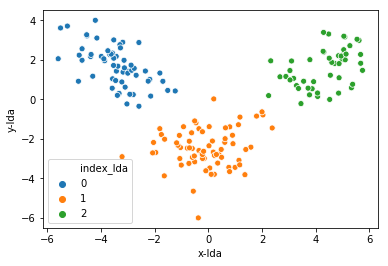

In [134]:
sns.scatterplot(df_lda['x-lda'], df_lda['y-lda'], hue = df_lda['index_lda'], palette=col )

In [135]:
from sklearn.decomposition import PCA
pca = PCA() # create a PCA object
pca.fit(df_scaled_df) # do the math
pca_data = pca.transform(df_scaled_df) 

In [136]:
kmean = KMeans(3)
model = kmean.fit(pca_data)
predict_pca = model.predict(pca_data)

In [137]:
predict_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [138]:
model.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02, -5.02855192e-02,
         7.46793027e-02,  2.12907099e-02,  7.43830113e-03,
         5.06192498e-02],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02,  3.22512140e-02,
        -2.30035303e-02, -1.39401351e-02, -4.38400536e-03,
        -8.61995490e-03],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03,  2.00269270e-02,
        -6.14683784e-02, -8.11598488e-03, -3.45518279e-03,
        -5.05509102e-02]])

In [139]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [140]:
cluster_centers = pca.inverse_transform(model.cluster_centers_)
cluster_centers

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [141]:
features_cluster = df_scaled_df.columns.tolist()

In [142]:
cluster_1 = dict(zip(features_cluster,cluster_centers[1]))
cluster_1 = sorted(cluster_1.items(), key=lambda kv: kv[1],reverse=True)

cluster_1[:9]

[('Hue', 0.4618036133845029),
 ('OD', 0.27076418899988763),
 ('Acl', 0.17060184440919282),
 ('Proanth', 0.05826550474829967),
 ('Flavanoids', 0.020812568569805814),
 ('Nonflavanoid.phenols', -0.033533566288779446),
 ('Phenols', -0.0759826451138606),
 ('Malic.acid', -0.3940415350461783),
 ('Mg', -0.49171185287238517)]

In [143]:
cluster_1[:9]

[('Hue', 0.4618036133845029),
 ('OD', 0.27076418899988763),
 ('Acl', 0.17060184440919282),
 ('Proanth', 0.05826550474829967),
 ('Flavanoids', 0.020812568569805814),
 ('Nonflavanoid.phenols', -0.033533566288779446),
 ('Phenols', -0.0759826451138606),
 ('Malic.acid', -0.3940415350461783),
 ('Mg', -0.49171185287238517)]

In [144]:
cluster_1 = dict(zip(features_cluster,cluster_centers[2]))
cluster_1 = sorted(cluster_1.items(), key=lambda kv: kv[1],reverse=True)

cluster_1[:9]

[('Color.int', 0.9415387376956247),
 ('Malic.acid', 0.8715470612840805),
 ('Nonflavanoid.phenols', 0.7260635362353485),
 ('Acl', 0.5243674579494935),
 ('Ash', 0.18689832973819137),
 ('Alcohol', 0.1649074646135148),
 ('Mg', -0.07547276689239119),
 ('Proline', -0.407087957509503),
 ('Proanth', -0.7797063884392602)]

In [145]:
cluster_1 = dict(zip(features_cluster,cluster_centers[0]))
cluster_1 = sorted(cluster_1.items(), key=lambda kv: kv[1],reverse=True)

cluster_1[:9]

[('Proline', 1.125185286830201),
 ('Flavanoids', 0.9778195571206048),
 ('Phenols', 0.8852373634617994),
 ('Alcohol', 0.8352320845326582),
 ('OD', 0.7792471073459591),
 ('Proanth', 0.5802865806735931),
 ('Mg', 0.5775867991647897),
 ('Hue', 0.473983649501457),
 ('Ash', 0.3647060418060398)]

In [146]:
df = pd.DataFrame({'one': cluster_centers[0],
                   'two': cluster_centers[1],
                   'three': cluster_centers[2]}, index = features_cluster)
    

In [147]:
df = df.T
df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
one,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
two,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
three,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [148]:
kmean = KMeans(3)
model_2 = kmean.fit(df_scaled_df)


In [149]:
model_2.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [150]:
cluster_centers = model_2.cluster_centers_

In [151]:
df = pd.DataFrame({'one': cluster_centers[0],
                   'two': cluster_centers[1],
                   'three': cluster_centers[2]}, index = features_cluster)
df.T

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
one,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
two,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
three,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


In [152]:
predict_pca = model.predict(pca_data)

In [153]:
def clus(df):
    clust_list = {}
    colu = df.columns.tolist()
    for i in colu :
        col = df.sort_values(by = i, ascending = False).head(10).index.tolist()
        dc = {i: col}
        clust_list.update(dc)
    pdf = pd.DataFrame.from_dict(clust_list)
    
    return pdf

In [154]:
clus(df)

,one,two,three
0,Color.int,Proline,Hue
1,Malic.acid,Flavanoids,OD
2,Nonflavanoid.phenols,Phenols,Acl
3,Acl,Alcohol,Proanth
4,Ash,OD,Flavanoids
5,Alcohol,Proanth,Nonflavanoid.phenols
6,Mg,Mg,Phenols
7,Proline,Hue,Malic.acid
8,Proanth,Ash,Mg
9,Phenols,Color.int,Ash


In [163]:
from_pca = pd.DataFrame({'one': weight(1).index, 'two': weight(2).index, 'three': weight(3).index})

In [164]:
from_pca

,one,two,three
0,Flavanoids,Color.int,Ash
1,Phenols,Alcohol,Acl
2,OD,Proline,Alcohol
3,Proanth,Ash,Nonflavanoid.phenols
4,Nonflavanoid.phenols,Mg,OD
5,Hue,Hue,Flavanoids
6,Proline,Malic.acid,Proanth
7,Malic.acid,OD,Phenols
8,Acl,Phenols,Color.int
9,Alcohol,Proanth,Mg


In [155]:
df_heat = df.T

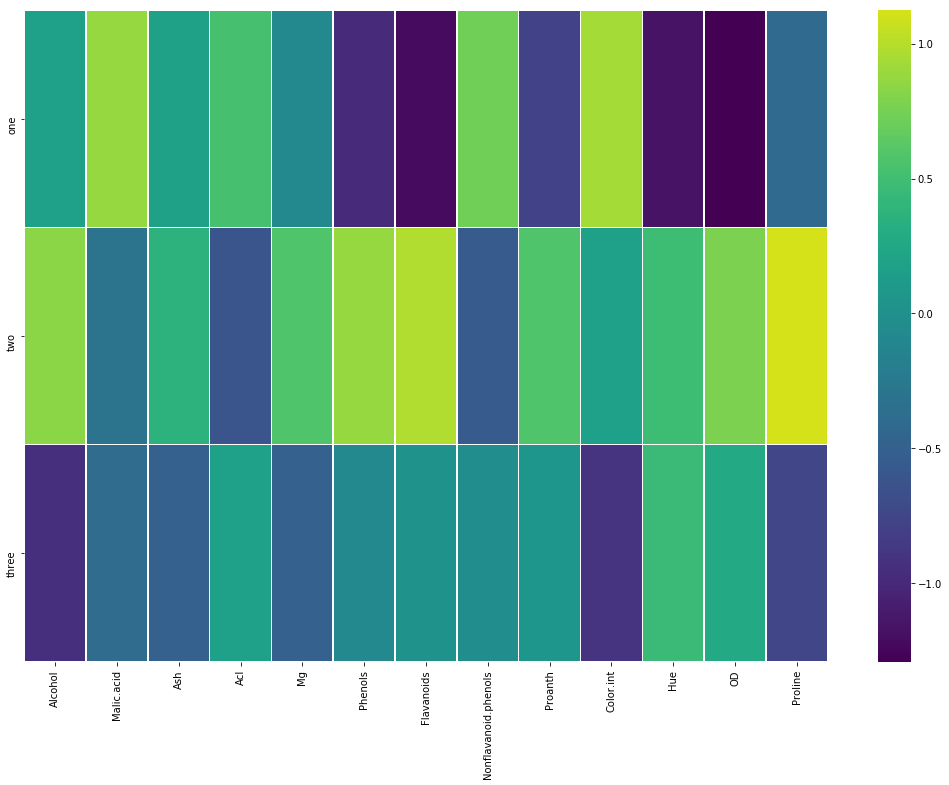

In [156]:
plt.figure(figsize= (18,12))
sns.heatmap(df_heat,  center= 0, linewidths= .5, cmap="viridis")